# Exercise Sheet 03: Item response theory and performance factors analysis

**Introduction to Data Mining WS24/25**  
**Bielefeld University**  
**Alina Deriyeva, Adia Khalid, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2024-11-18**  
**Exercise Sheet Submission Deadline: Friday, 2024-11-29, noon (i.e. 12:00), via moodle**

**NOTE** The use of language models/AI tools is permitted under three conditions
1. transparency: you tell us that you used them
2. accountability: you take full responsibility for the submission, can explain and defend it
3. privacy: you do not transmit any private information to any external tool

We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool for research purposes.

### Task 03.01

Let $X$ be a random variable that expresses whether a student gets a task right or wrong, let $B$ be a random variable expressing the difficulty of the task, and let $\Theta$ be a random variable expressing the students' ability. Further, let's assume a one-parameter IRT model, that is:

\begin{equation}
p_{X|B,\Theta}(1|b,\theta) = \frac{1}{1 + \exp[-(\theta-b)]}.
\end{equation}

Finally, assume that $\Theta$ is standard normally distributed.

1. Using the law of total probability, write down the expression for $p_{X|B}(1|b)$.
2. Use the following approximation ([Crooks, 2007](https://threeplusone.com/pubs/on_logistic_normal.pdf)) to find a closed-form expression for $p_{X|B}(1|b)$:
\begin{equation}
\int_{-\infty}^\infty \frac{1}{1 + \exp(-x)} \cdot N(x|y,1) dx \approx \frac{1}{1 + \exp(-\sqrt{1 + \frac{\pi}{8}} \cdot y)}
\end{equation}
where $N(x|y, 1)$ denotes the Gaussian density for $x$ with mean $y$ and standard deviation $1$.
3. Let $q$ be the rate of actual students passing the task. What is the value of $b$ one should set to get $p_{X|B}(x|b) = q$?


**ANSWER:** PLEASE PROVIDE LATEX CODE OR AN IMAGE OF YOUR DERIVATION HERE

## Preamble: Data set

The file `sheet03_data.csv` contains fictional data of a class of students completing a set of tasks. Each row indicates a student, each column indicates a task. Each task is only graded as 'passed' (1) or 'failed' (0).

The following code loads this raw data and prints it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.loadtxt('sheet03_data.csv', skiprows = 1, delimiter = '\t', dtype=int)
N, m = X.shape
print(X)

[[1 1 0 ... 0 1 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 1 1 1]
 [1 0 0 ... 0 0 0]]


### Task 03.02

Before we apply any advanced data mining, let us compute some basic statistics to get a sense of the data.

Provide a bar plot with the task index on the x axis and the pass rate on the y axis. Don't forget to label your axes.

Provide a second bar plot with the student index on the x axis and the pass rate on the y axis. Don't forget to label your axes.

range(0, 150)


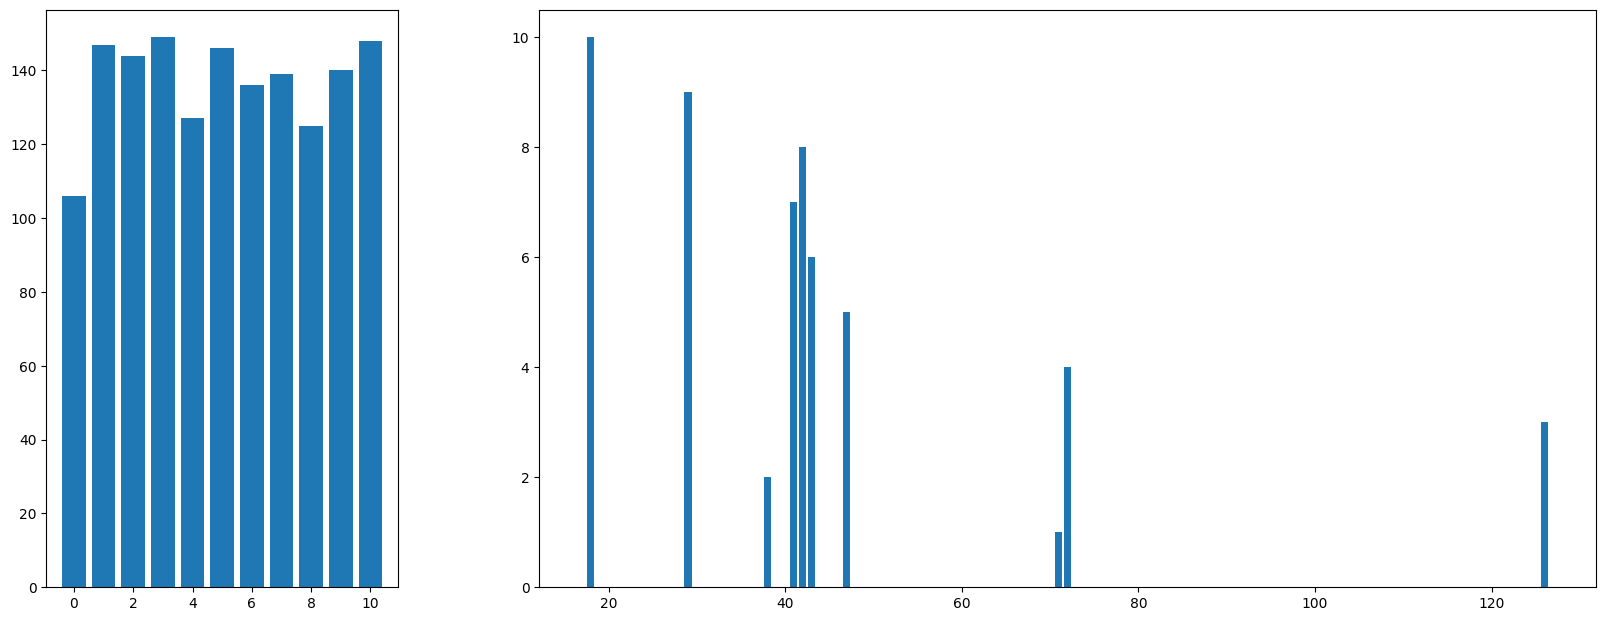

In [ ]:
success_per_task = np.sum(X, axis=0)
success_per_student = np.sum(X, axis=1)

# no idea why the bar plot with the student successes looks like it does
fig, (student_plot, exercise_plot) = plt.subplots(1, 2, width_ratios=[1,3], figsize=(20, 7.5))
student_plot.bar(success_per_student, range(N))
exercise_plot.bar(success_per_task, range(m))

## Item Response Theory

Now, we want to fit item response theory models to our data. We will start with a 1-parameter model and then continue with a 2-parameter model.

For the former, we will use the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) interface from scikit-learn. For the latter, we will use the [girth](https://github.com/eribean/girth) software package.

### Task 03.03

Right now, our data is in the form of an $N \times m$ matrix, where $N$ is the number of students and $m$ is the number of tasks. To plug this data into logistic regression, we need to convert it to a different format.

1. Prepare a $(N \cdot m) \times (N + m)$ matrix `Xlogreg` where each row represents a student-task combination. All entries are zero except for the entries `Xlogreg[i*m+j, i] = 1`, `Xlogreg[i*m+j, N+j] = 1` for all $i \in \{0, \ldots, N-1\}$ and all $j \in \{0, \ldots, m-1\}$. This is the feature matrix for our logistic regression.
2. Prepare a vector `ylogreg` with $N \cdot m$ entries where each entry represents a student-task combination and `ylogreg[i*m+j] = X[i, j]` for all $i \in \{0, \ldots, N-1\}$ and all $j \in \{0, \ldots, m-1\}$.

### Task 03.04

Use the new format of the data to train an [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model with `penalty = 'l2'`, `C = 1.0`, and `fit_intercept = False`.

Report the accuracy of the model by printing the output of the `score` function of the model.

### Task 03.05

The learned parameters of the model are stored in the `coef_` attribute. The first $N$ parameters represent the estimated student abilities, the last $m$ parameters represent the negative (!) estimated task difficulties.

Extract abilities and task difficulties.

Provide a scatter plot with estimated task difficulties on the x axis and pass rates on the y axis. Don't forget to label your axes.

Provide a scatter plot with estimated student abilities on the x axis and pass rates on the y axis. Don't forget to label your axes.

### Task 03.06

Plot the item characteristic curve for the second task (item index 1) according to your IRT model. To do so, sample 61 abilities via the `np.linspace` function in the range $[-3, +3]$ and plot the value of the function

\begin{equation*}
p(x = 1|\theta, b_2) = \frac{1}{1 + \exp(-(\theta - b_2))}
\end{equation*}

where $b_2$ is the difficulty of the second task and $\theta$ is the ability.

### Task 03.07

To validate the item characteristic curve of item 2 (see Task 03.05), provide a plot of the pass rate of students within a certain range of abilities. In particular, compute the pass rates for students with an ability between -2.5 and -1.5, between -1.5 and -0.5, between -0.5 and +0.5, beween +0.5 and +1.5, and between +1.5 and +2.5. Then, plot these values on the y axis versus x values -2, -1, 0, +1, +2.

Plot the item characteristic curve from task 03.05 as well.

Compare the pass rate curve to the item characteristic curve. Are they similar? What is different?

**ANSWER:** 

### Preamble: Knowledge Tracing Data set

Consider the data set in `kt_data.csv`. This data set contains the exercise results for a population of fictional students and two skills.

Each row corresponds to one attempt of one student on an exercise. The first column indicates the student index $i$, the second column the time $t$, the third column the exercise index $j$, the fourth whether this exercise needs the first skill (0 if no, 1 if yes), the fifth column whether this exercise needs the second skill (0 if no, 1 if yes), and the sixth column the outcome of the attempt: 0 for a failure, 1 for a success.

The following code loads the raw data and prints it.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.loadtxt('kt_data.csv', skiprows = 1, delimiter = '\t', dtype=int)
print(X)

[[ 0  0  1  1  0  0]
 [ 0  1  1  1  0  0]
 [ 0  2  1  1  0  0]
 [ 0  3  2  0  1  0]
 [ 0  4  1  1  0  0]
 [ 0  5  4  1  1  1]
 [ 0  6  3  0  1  0]
 [ 0  7  4  1  1  1]
 [ 0  8  1  1  0  1]
 [ 0  9  4  1  1  1]
 [ 0 10  2  0  1  1]
 [ 1  0  4  1  1  1]
 [ 1  1  2  0  1  0]
 [ 1  2  3  0  1  1]
 [ 1  3  2  0  1  1]
 [ 1  4  2  0  1  1]
 [ 1  5  4  1  1  1]
 [ 1  6  3  0  1  1]
 [ 1  7  2  0  1  1]
 [ 1  8  0  1  0  1]
 [ 2  0  5  1  1  0]
 [ 2  1  2  0  1  0]
 [ 2  2  3  0  1  1]
 [ 2  3  0  1  0  1]
 [ 2  4  3  0  1  0]
 [ 2  5  4  1  1  1]
 [ 2  6  4  1  1  1]
 [ 2  7  0  1  0  1]
 [ 2  8  0  1  0  1]
 [ 2  9  1  1  0  1]
 [ 3  0  1  1  0  0]
 [ 3  1  3  0  1  0]
 [ 3  2  5  1  1  0]
 [ 3  3  3  0  1  0]
 [ 3  4  5  1  1  1]
 [ 3  5  3  0  1  0]
 [ 3  6  3  0  1  0]
 [ 3  7  3  0  1  1]
 [ 3  8  4  1  1  1]
 [ 3  9  0  1  0  1]
 [ 3 10  1  1  0  1]
 [ 4  0  4  1  1  0]
 [ 4  1  2  0  1  0]
 [ 4  2  0  1  0  0]
 [ 4  3  4  1  1  0]
 [ 4  4  0  1  0  1]
 [ 4  5  2  0  1  1]
 [ 4  6  0  1

## Performance Factors analysis


Recall the form of a performance factors analysis model: The logit-probability that student $i$ achieves a success at time step $t$, given all their previous successes and failures, is modelled as

\begin{equation}
\sum_{k \in \mathcal{K}_{i, t}} \gamma_k \cdot s_{i, k, t} + \rho_k \cdot f_{i, k, t} + \beta_k
\end{equation}

where $\mathcal{K}_{i, t}$ is the set of skills needed for the exercise student $i$ attempts at time step $t$, where $s_{i, k, t}$ is the number of past successes of student $i$ on skill $k$ before time step $t$, where $f_{i, k, t}$ is the number of past failures of student $i$ on skill $k$ before time step $t$, and where $\gamma_k$, $\rho_k$, and $\beta_k$ are the parameters of the model.

Note that this is, essentially, a logistic regression model, where $s_{i, k, t}$ and $f_{i, k, t}$ are the features and $x_{i, t}$ is the target to be predicted.


### Task 03.08

Find a formula for $\theta_{i, k, t}$, meaning the amount of skill that student $i$ has achieved in skill $k$ at time $t$ in the PFA model.

**ANSWER:** PLEASE PROVIDE LATEX CODE OR AN IMAGE OF YOUR DERIVATION HERE

### Task 03.09

Convert the data set into a feature matrix `Xlogreg` for a logistic [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model, where each row corresponds to one attempt of one student $i$ on an exercise (just as in the raw data) and where the columns are $s_{i, 1, t}$, $f_{i, 1, t}$, 1, $s_{i, 2, t}$, $f_{i, 2, t}$, and 1 again, meaning the past successes and the past failures for the first and the second skill for student $i$ at time $t$.

HOWEVER make sure to set the first three columns to zero in every row where the exercise that student $i$ attempts at time $t$ does not involve the first skill and the last three columns to zero in every row where the exercise does not involve the second skill.

**HINT:** Look again at the video in moodle for an example of this process. While this task is not hard to program, per se, the devil is in the details.

### Task 03.10

Use the matrix `Xlogreg` from Task 03.09 and the last column of `X` (as targets) to train an [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model with `penalty = 'l2'`, `fit_intercept = False`, and `C = 1.0`.

Report the accuracy of the model by printing the output of the `score` function of the model.

### Task 03.11

Print the trained parameters of the model in the following format:

```
gamma_1 = %g
rho_1   = %g
beta_1  = %g
gamma_2 = %g
rho_2   = %g
beta_2  = %g
```

Given these parameters, compute the amount of the first skill for a student with 3 past successes and 1 past failure and print it.

### Task 03.12

For each student in the data set, provide a plot with time on the x axis and the predicted success probability of the performance factors analysis model on the y axis.

### Task 03.13

In the previous task, you probably noticed that the predicted success probability of the performance factors analysis model sometimes drops for later timesteps. Explain this finding.

**ANSWER:** 